In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
# nltk.download('punkt')
# nltk.download('stopwords')



In [2]:
df = pd.read_csv(r"C:\sem5\nlp\project\AniMate\AnimeData_300724_processed.csv")
df

,title,episodes,release_year,status,genres,studio,source,demographic,synopsis
0,Shingeki no Kyojin,25.0,2013,Finished,"Action, Award Winning, Drama, Suspense",Wit Studio,Manga,Shounen,centuries ago mankind was slaughtered to near ...
1,Fullmetal Alchemist: Brotherhood,64.0,2009,Finished,"Action, Adventure, Drama, Fantasy",Bones,Manga,Shounen,after a horrific alchemy experiment goes wrong...
2,One Punch Man,12.0,2015,Finished,"Action, Comedy",Madhouse,Web manga,Seinen,the seemingly unimpressive saitama has a rathe...
3,Sword Art Online,25.0,2012,Finished,"Action, Adventure, Fantasy, Romance",A-1 Pictures,Light novel,NaN,ever since the release of the innovative nerve...
4,Kimetsu no Yaiba,26.0,2019,Finished,"Action, Award Winning, Fantasy",ufotable,Manga,Shounen,ever since the death of his father the burden ...
...,...,...,...,...,...,...,...,...,...
26789,Money Wars: Nerawareta Waterfront Keikaku,NaN,1991,Finished,NaN,Gainax,Original,Seinen,a new waterfront area is being built in tokyo ...
26790,Otokogi,3.0,1990,Finished,NaN,Unknown,Manga,Seinen,after his father leaves when he is very young ...
26791,Shin Otokogi,2.0,1998,Finished,NaN,Unknown,Manga,Seinen,the sequel to the trilogy otokogi which follow...
26792,Kuro to Kin no Akanai Kagi.,2.0,2013,Finished,NaN,An DerCen,Visual novel,Josei,katagiri kanade is a hikikomori who spent her ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26794 entries, 0 to 26793
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26794 non-null  object 
 1   episodes      14396 non-null  float64
 2   release_year  26794 non-null  int64  
 3   status        26389 non-null  object 
 4   genres        20119 non-null  object 
 5   studio        25663 non-null  object 
 6   source        23896 non-null  object 
 7   demographic   10142 non-null  object 
 8   synopsis      26785 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ MB


In [4]:
def check_missing_values(df):
    """
    Loops through each column in the DataFrame to check for missing values and prints the count.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        if missing_count > 0:
            print(f"Column '{column}' has {missing_count} missing values.")
        else:
            print(f"Column '{column}' has no missing values.")

check_missing_values(df)


Column 'title' has no missing values.
Column 'episodes' has 12398 missing values.
Column 'release_year' has no missing values.
Column 'status' has 405 missing values.
Column 'genres' has 6675 missing values.
Column 'studio' has 1131 missing values.
Column 'source' has 2898 missing values.
Column 'demographic' has 16652 missing values.
Column 'synopsis' has 9 missing values.


In [5]:
df.shape

(26794, 9)

In [6]:
df.drop_duplicates(inplace=True)    

In [7]:
df.shape

(26753, 9)

In [8]:
df[['title','genres','studio','source','demographic','synopsis']]

,title,genres,studio,source,demographic,synopsis
0,Shingeki no Kyojin,"Action, Award Winning, Drama, Suspense",Wit Studio,Manga,Shounen,centuries ago mankind was slaughtered to near ...
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",Bones,Manga,Shounen,after a horrific alchemy experiment goes wrong...
2,One Punch Man,"Action, Comedy",Madhouse,Web manga,Seinen,the seemingly unimpressive saitama has a rathe...
3,Sword Art Online,"Action, Adventure, Fantasy, Romance",A-1 Pictures,Light novel,NaN,ever since the release of the innovative nerve...
4,Kimetsu no Yaiba,"Action, Award Winning, Fantasy",ufotable,Manga,Shounen,ever since the death of his father the burden ...
...,...,...,...,...,...,...
26789,Money Wars: Nerawareta Waterfront Keikaku,NaN,Gainax,Original,Seinen,a new waterfront area is being built in tokyo ...
26790,Otokogi,NaN,Unknown,Manga,Seinen,after his father leaves when he is very young ...
26791,Shin Otokogi,NaN,Unknown,Manga,Seinen,the sequel to the trilogy otokogi which follow...
26792,Kuro to Kin no Akanai Kagi.,NaN,An DerCen,Visual novel,Josei,katagiri kanade is a hikikomori who spent her ...


C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\4252363635.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


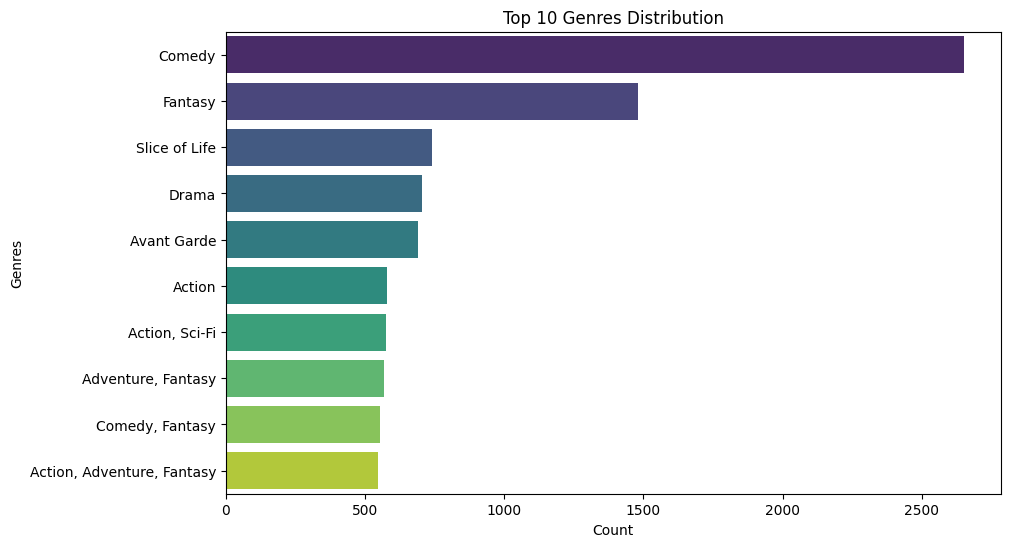

C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\4252363635.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


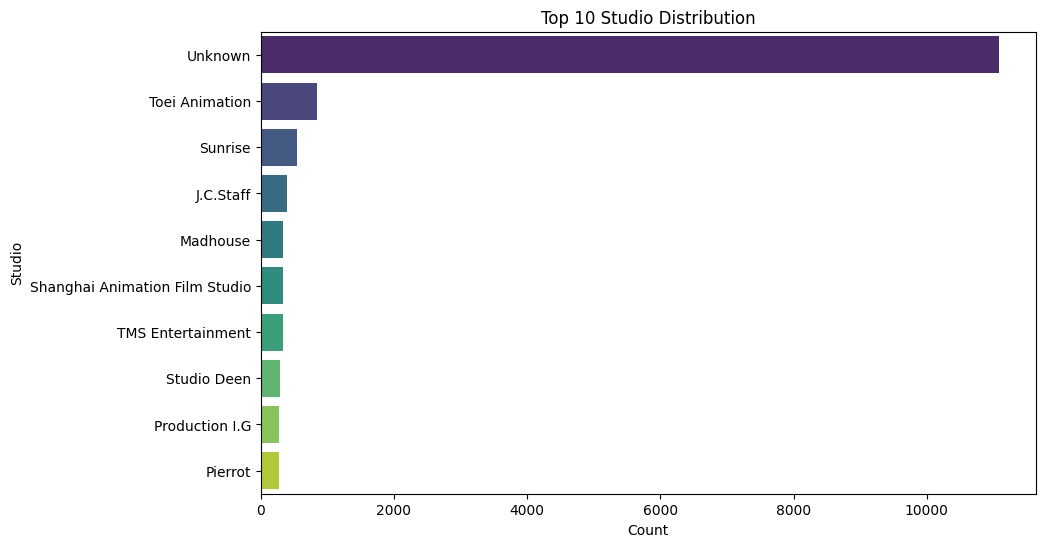

C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\4252363635.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


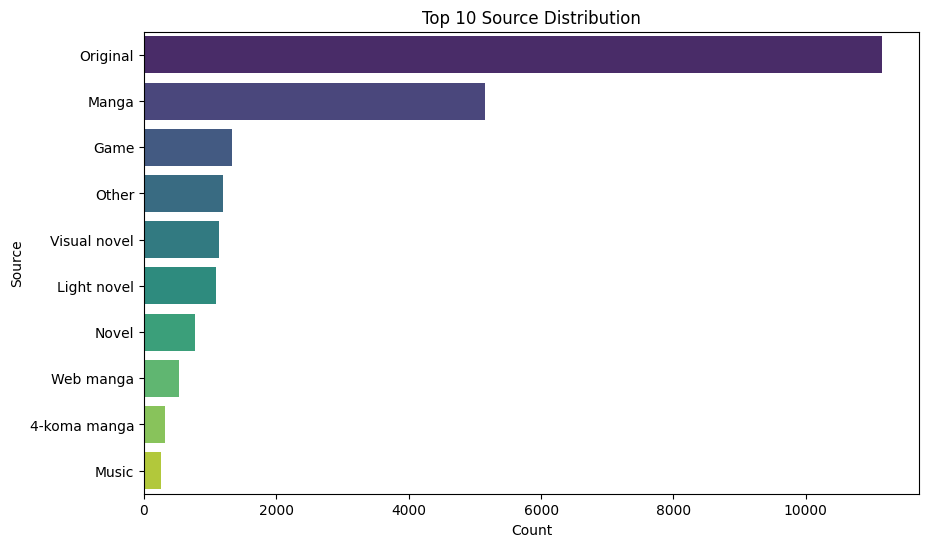

C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\4252363635.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


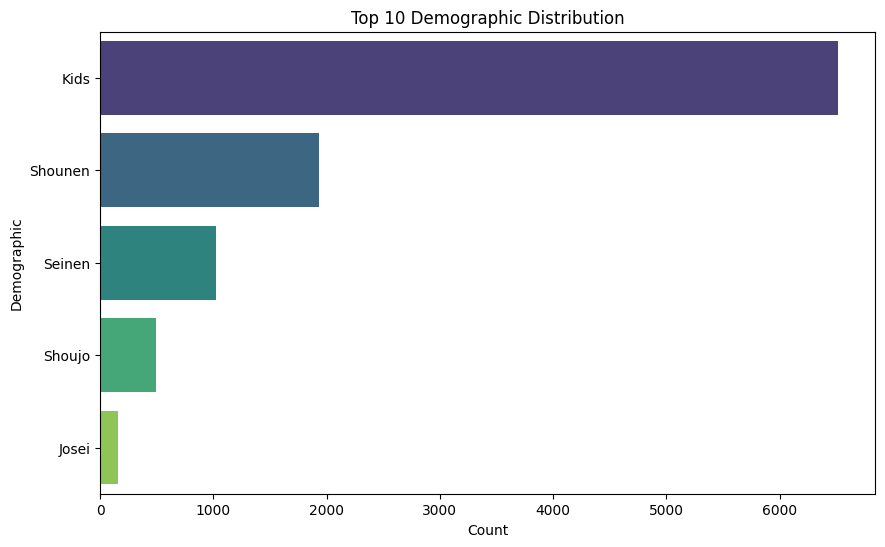

In [9]:
def plot_categorical_distribution(df, column_name, top_n=10):
    """
    Plots the distribution of categorical data in a bar plot.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column_name (str): The column name for which to plot the distribution.
    top_n (int): Number of top categories to display (default is 10).
    """
    
    # Count the occurrences of each category
    category_counts = df[column_name].value_counts().head(top_n)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
    
    # Adding titles and labels
    plt.title(f"Top {top_n} {column_name.capitalize()} Distribution")
    plt.xlabel("Count")
    plt.ylabel(column_name.capitalize())
    
    plt.show()

plot_categorical_distribution(df, 'genres')
plot_categorical_distribution(df, 'studio')
plot_categorical_distribution(df, 'source')
plot_categorical_distribution(df, 'demographic')

In [10]:
def text_processing(df):
    """
    Preprocess the 'title', 'genres', 'source', 'demographic', and 'synopsis' columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing relevant columns.
    
    Returns:
    tuple: A tuple containing the TF-IDF DataFrame and the TF-IDF vectorizer.
    """
    
    # Fill missing values with an empty string
    df.fillna('', inplace=True)
    
    # Initialize the PorterStemmer and stopwords list
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Stopword Removal and Stemming
        processed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(processed)
    
    # Apply preprocessing to 'title', 'genres', 'source', 'demographic', and 'synopsis'
    # df['title_processed'] = df['title'].apply(preprocess_text)
    df['genres_processed'] = df['genres'].apply(preprocess_text)
    df['source_processed'] = df['source'].apply(preprocess_text)
    df['demographic_processed'] = df['demographic'].apply(preprocess_text)
    df['synopsis_processed'] = df['synopsis'].apply(preprocess_text)
    
    # Combine the processed text columns into one
    df['combined_text'] = (#df['title_processed'] + ' ' +
                           df['genres_processed'] + ' ' +
                           df['source_processed'] + ' ' +
                           df['demographic_processed'] + ' ' +
                           df['synopsis_processed'])
    
    # Apply TF-IDF to the combined text
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                            columns=tfidf_vectorizer.get_feature_names_out())
    
    return tfidf_df, tfidf_vectorizer

# Example usage
tfidf_features_df, tfidf_vectorizer = text_processing(df)
print(tfidf_features_df.head())


C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\3552592106.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


   abandon  abduct  abe  abil       abl  abnorm  aboard  abroad  abruptli  \
0      0.0     0.0  0.0   0.0  0.000000     0.0     0.0     0.0       0.0   
1      0.0     0.0  0.0   0.0  0.000000     0.0     0.0     0.0       0.0   
2      0.0     0.0  0.0   0.0  0.055744     0.0     0.0     0.0       0.0   
3      0.0     0.0  0.0   0.0  0.000000     0.0     0.0     0.0       0.0   
4      0.0     0.0  0.0   0.0  0.083732     0.0     0.0     0.0       0.0   

   absenc  ...  zhi  zhou  zhu  zodiac  zoid  zombi  zone  zoo  zorori  \
0     0.0  ...  0.0   0.0  0.0     0.0   0.0    0.0   0.0  0.0     0.0   
1     0.0  ...  0.0   0.0  0.0     0.0   0.0    0.0   0.0  0.0     0.0   
2     0.0  ...  0.0   0.0  0.0     0.0   0.0    0.0   0.0  0.0     0.0   
3     0.0  ...  0.0   0.0  0.0     0.0   0.0    0.0   0.0  0.0     0.0   
4     0.0  ...  0.0   0.0  0.0     0.0   0.0    0.0   0.0  0.0     0.0   

   zutomayo  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows

In [11]:
def recommend_anime(title, tfidf_features_df, df, top_n=10):
    """
    Recommend anime titles based on content similarity.
    
    Parameters:
    title (str): The title of the anime for which recommendations are needed.
    tfidf_features_df (pd.DataFrame): The DataFrame containing TF-IDF features.
    df (pd.DataFrame): Original DataFrame containing anime data.
    top_n (int): Number of recommendations to return (default is 10).
    
    Returns:
    pd.DataFrame: A DataFrame containing the top recommended anime titles.
    """
    
    # Ensure the title exists in the dataset
    if title not in df['title'].values:
        return "Title not found in the dataset."
    
    # Get the index of the anime that matches the title
    idx = df.index[df['title'] == title].tolist()
    
    if not idx:
        return "Title not found in the dataset."
    
    idx = idx[0]
    
    # Calculate cosine similarity between the input anime and all others
    cosine_sim = cosine_similarity(tfidf_features_df.iloc[[idx]], tfidf_features_df)
    
    # Get the top N most similar anime indices (excluding the input anime)
    similar_indices = cosine_sim[0].argsort()[-top_n-1:-1][::-1]
    
    # Return the most similar anime titles
    return df.iloc[similar_indices][['title', 'genres', 'synopsis']]

# Example usage
recommended_animes = recommend_anime('Shingeki no Kyojin', tfidf_features_df, df, top_n=10)
print(recommended_animes)


                                                  title  \
9                           Shingeki no Kyojin Season 2   
13                          Shingeki no Kyojin Season 3   
1818                                 Shingeki no Kyotou   
1131  Shingeki no Kyojin Season 2 Movie: Kakusei no ...   
15                   Shingeki no Kyojin Season 3 Part 2   
64          Shingeki no Kyojin: The Final Season Part 2   
23                 Shingeki no Kyojin: The Final Season   
7880                        Shingeki! Kyojin Chuugakkou   
1097                           Kidou Senshi Zeta Gundam   
4671                                    Super Titans 15   

                              genres  \
9            Action, Drama, Suspense   
13           Action, Drama, Suspense   
1818                 Action, Fantasy   
1131         Action, Drama, Suspense   
15           Action, Drama, Suspense   
64           Action, Drama, Suspense   
23           Action, Drama, Suspense   
7880                          

In [12]:
def recommend_based_on_query(query, tfidf_vectorizer, tfidf_features_df, df, top_n=10):
    """
    Recommend anime titles based on a user query (e.g., 'ninja related anime').
    
    Parameters:
    query (str): The user's input query.
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used for the anime data.
    tfidf_features_df (pd.DataFrame): The DataFrame containing TF-IDF features.
    df (pd.DataFrame): Original DataFrame containing anime data.
    top_n (int): Number of recommendations to return (default is 10).
    
    Returns:
    pd.DataFrame: A DataFrame containing the top recommended anime titles.
    """
    
    # Initialize the PorterStemmer and stopwords list for preprocessing
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Stopword Removal and Stemming
        processed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(processed)
    
    # Preprocess and vectorize the query
    query_processed = preprocess_text(query)
    query_tfidf = tfidf_vectorizer.transform([query_processed])
    
    # Calculate cosine similarity between the query and all anime
    cosine_sim = cosine_similarity(query_tfidf, tfidf_features_df)
    
    # Get the top N most similar anime indices
    similar_indices = cosine_sim[0].argsort()[-top_n:][::-1]
    
    # Return the most similar anime titles
    return df.iloc[similar_indices][['title', 'genres', 'synopsis']]

# Example usage
user_query = "ninja related anime"
recommended_animes_query = recommend_based_on_query(user_query, tfidf_vectorizer, tfidf_features_df, df, top_n=10)
print(recommended_animes_query)


                                           title  genres  \
11149           Ninja Hattori-kun (2012) Special  Comedy   
1462                 Ninja Slayer From Animation  Action   
20416      Ninja Tamamaru: Toukaidou Gojuusan-ji           
20415                             Ninja Tamamaru           
3222              Ninja Batman tai Yakuza League  Action   
3442                                Ninjala (TV)  Action   
20471                        Shin Ninja Tamamaru           
11323                             Pyun Pyun Maru  Comedy   
10051                   Ninja Hattori-kun (2012)  Comedy   
20219  Koutsuu Anzen de Gozaru Ninja Hattori-kun           

                                                synopsis  
11149                        special of ninja hattorikun  
1462   ninja ninja were merciless demigods ruling jap...  
20416                 the third season of ninja tamamaru  
20415  a simple short anime series about a ninja name...  
3222                              sequel to 

### REPLY

In [16]:
def recommend_based_on_query(query, tfidf_vectorizer, tfidf_features_df, df, top_n):
    """
    Recommend anime titles based on a user query using TF-IDF and cosine similarity.
    
    Parameters:
    query (str): The user's input query.
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used for the anime data.
    tfidf_features_df (pd.DataFrame): The DataFrame containing TF-IDF features.
    df (pd.DataFrame): Original DataFrame containing anime data.
    top_n (int): Number of recommendations to return (default is 10).
    
    Returns:
    pd.DataFrame: A DataFrame containing the top recommended anime titles.
    """
    # Initialize the PorterStemmer and stopwords list for preprocessing
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Stopword Removal and Stemming
        processed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(processed)
    
    # Preprocess and vectorize the query
    query_processed = preprocess_text(query)
    query_tfidf = tfidf_vectorizer.transform([query_processed])
    
    # Calculate cosine similarity between the query and all anime
    cosine_sim = cosine_similarity(query_tfidf, tfidf_features_df)
    
    # Get the top N most similar anime indices
    similar_indices = cosine_sim[0].argsort()[-top_n:][::-1]
    
    # Return the most similar anime titles
    return df.iloc[similar_indices][['title', 'genres', 'synopsis']]

def generate_response(query, tfidf_vectorizer, tfidf_features_df, df, top_n=10):
    """
    Generate a response based on user query in a conversational format.
    
    Parameters:
    query (str): The user's input query.
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used for the anime data.
    tfidf_features_df (pd.DataFrame): The DataFrame containing TF-IDF features.
    df (pd.DataFrame): Original DataFrame containing anime data.
    top_n (int): Number of recommendations to return (default is 10).
    
    Returns:
    str: A response string listing the recommended anime titles.
    """
    # Get recommendations based on the query
    recommendations = recommend_based_on_query(query, tfidf_vectorizer, tfidf_features_df, df, top_n)
    
    # Format the response
    response = f"Based on your request for '{query}', here are some anime recommendations:\n\n"
    for index, row in recommendations.iterrows():
        response += f"Title: {row['title']}\nGenres: {row['genres']}\nSynopsis: {row['synopsis']}\n\n"
        
    
    return response

# Example usage
user_query = "I want to watch Fairy tale related movies"
response = generate_response(user_query, tfidf_vectorizer, tfidf_features_df, df, top_n=10)
print(response)

Based on your request for 'I want to watch Fairy tale related movies', here are some anime recommendations:

Title: gdgd Fairies Movie Specials
Genres: Comedy, Fantasy
Synopsis: specials bundled with bluray release of gdgd fairies movie first episode is about the three fairies holding a press conference second episode is about them going to see a movie

Title: Onegai☆Twins: Relations
Genres: Comedy, Drama, Sci-Fi
Synopsis: no synopsis yet

Title: Amada Anime Series: Super Mario Brothers
Genres: Adventure, Comedy
Synopsis: the super mario amada series are a series of short japanese fairy tales anime that is found and released only in japan the series are released in august  once again only in japan making it extremely rare to people not living in japan the series is based on one of the three japanese fairy tales that are told to children additionally the series contained mario series that are played in the three short japanese fairy tales the characters introduced mario luigi princess p

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    """
    Tokenize, remove stopwords, and apply stemming to the text.
    
    Parameters:
    text (str): Input text to preprocess.
    
    Returns:
    str: Preprocessed text.
    """
    # Initialize the PorterStemmer and stopwords list
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Stopword Removal and Stemming
    processed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(processed)


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Define preprocess_text function
def preprocess_text(text):
    """
    Tokenize, remove stopwords, and apply stemming to the text.
    
    Parameters:
    text (str): Input text to preprocess.
    
    Returns:
    str: Preprocessed text.
    """
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer

    # Initialize the PorterStemmer and stopwords list
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Stopword Removal and Stemming
    processed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(processed)

# Define text_processing function
def text_processing(df):
    """
    Preprocess the 'title', 'genres', 'source', 'demographic', and 'synopsis' columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing 'title', 'genres', 'source', 'demographic', and 'synopsis' columns.
    
    Returns:
    tuple: (DataFrame with TF-IDF features, TF-IDF Vectorizer)
    """
    
    # Fill missing values with an empty string
    df.fillna('', inplace=True)
    
    # Apply preprocessing to 'title', 'genres', 'source', 'demographic', and 'synopsis'
    # df['title_processed'] = df['title'].apply(preprocess_text)
    df['genres_processed'] = df['genres'].apply(preprocess_text)
    df['source_processed'] = df['source'].apply(preprocess_text)
    df['demographic_processed'] = df['demographic'].apply(preprocess_text)
    df['synopsis_processed'] = df['synopsis'].apply(preprocess_text)
    
    # Combine the processed text columns into one
    df['combined_text'] = df['genres_processed'] + ' ' +  df['source_processed'] + ' ' + df['demographic_processed'] + ' ' + df['synopsis_processed']
    
    # Apply TF-IDF to the combined text
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                            columns=tfidf_vectorizer.get_feature_names_out())
    
    return tfidf_df, tfidf_vectorizer

# Define build_knn_model function
def build_knn_model(tfidf_features_df, n_neighbors=10):
    """
    Build and fit a k-NN model using the TF-IDF features.
    
    Parameters:
    tfidf_features_df (pd.DataFrame): DataFrame with TF-IDF features.
    n_neighbors (int): Number of neighbors to use for k-NN (default is 10).
    
    Returns:
    NearestNeighbors: Fitted k-NN model.
    """
    # Create and fit the k-NN model
    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    knn_model.fit(tfidf_features_df)
    
    return knn_model

# Define recommend_anime_knn function
def recommend_anime_knn(query, tfidf_vectorizer, tfidf_features_df, knn_model, df, top_n=10):
    """
    Recommend anime titles based on a user query using the k-NN model.
    
    Parameters:
    query (str): The user's input query.
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used for the anime data.
    tfidf_features_df (pd.DataFrame): The DataFrame containing TF-IDF features.
    knn_model (NearestNeighbors): The k-NN model for finding similar animes.
    df (pd.DataFrame): Original DataFrame containing anime data.
    top_n (int): Number of recommendations to return (default is 10).
    
    Returns:
    pd.DataFrame: A DataFrame containing the top recommended anime titles.
    """
    
    # Preprocess and vectorize the query
    query_processed = preprocess_text(query)
    query_tfidf = tfidf_vectorizer.transform([query_processed])
    
    # Find the nearest neighbors
    distances, indices = knn_model.kneighbors(query_tfidf, n_neighbors=top_n)
    
    # Get the top N most similar anime titles
    recommended_animes = df.iloc[indices[0]]
    
    return recommended_animes[['title', 'genres', 'synopsis']]

# Example usage
df = pd.read_csv(r"C:\sem5\nlp\project\AniMate\AnimeData_300724_processed.csv")
tfidf_features_df, tfidf_vectorizer = text_processing(df)
knn_model = build_knn_model(tfidf_features_df)

user_query = "I want to watch Fairy tale related movies"
recommended_animes_query = recommend_anime_knn(user_query, tfidf_vectorizer, tfidf_features_df, knn_model, df, top_n=10)
print(recommended_animes_query)


C:\Users\Shrawani\AppData\Local\Temp\ipykernel_16712\2018469712.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)
c:\sem5\nlp\project\AniMate\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


                                                   title  \
10737    gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?   
11339  Konna Watashitachi ga Nariyuki de Heroine ni N...   
10600                                     Hanasaka Jijii   
5913            Amada Anime Series: Super Mario Brothers   
5970                          Shin Grimm Meisaku Gekijou   
6387   AIUEO Anime Sekai no Douwa: Aesop Monogatari A...   
12544                        gdgd Fairies Movie Specials   
15589                                Pipi Tobenai Hotaru   
20809                                 Oyayubi-hime (OVA)   
5825                               Grimm Meisaku Gekijou   

                           genres  \
10737             Comedy, Fantasy   
11339                      Comedy   
10600               Comedy, Drama   
5913            Adventure, Comedy   
5970   Adventure, Comedy, Fantasy   
6387           Adventure, Fantasy   
12544             Comedy, Fantasy   
15589              Drama, Fantasy   
20809 